In [1]:
from adex.helpers import get_pre_processed_dataset
from adex.models import Condition
from adex.models import METADATA_COLUMNS
from adex.pca import PcaHelper

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

import logging
logging.basicConfig(format='%(levelname)s : %(message)s', level=logging.INFO)
logging.root.level = 20

files_path = "../data/adex-database/samples"
metadata_path = "../data/adex-database/metadata.tsv"

# Experiment with PCA for the RA dataset

In [32]:
# Example
ra_dataset = get_pre_processed_dataset(Condition.RA, files_path, metadata_path)
ra_dataset.head()

Sample,RFC2,HSPA6,PAX8,GUCA1A,THRA,PTPN21,CCL5,CYP2E1,EPHB3,ESRRA,CYP2A6,SCARB1,TTLL12,WFDC2,MAPK1,ADAM32,SPATA17,PRR22,PXK,VPS18,MSANTD3,SLC46A1,TIMD4,SLC39A5,ATP6V1E2,AFG3L1P,CILP2,PIGX,TMEM196,SLC39A13,BEST4,AK9,CORO6,TMEM106A,ALG10,TTC39C,…,FLJ42393,LOC100288169,LOC729602,H3F3C,LOC729991,LOC100132999,LOC285033,OR10G4,LOC653888,FABP5P3,LOC100132832,LOC171220,LOC100291689,POTEC,LOC100134412,LOC100294376,LOC100287430,TOP1P1,FKSG43,LOC644006,LOC728734,LOC729992,LOC100289068,LOC646817,LOC100294318,LOC643446,FLJ45340,LOC399940,GSE,Experimental Strategy,GPL,Condition,Tissue,Cell Type,Gender,Age,Ethnicity
str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,…,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str
"""GSM2370994""","""7.757398298137…","""8.527664702347…","""12.02470967409…",null,"""13.07281086083…",null,"""6.631484644347…","""7.739105247441…","""8.988935631264…","""11.27723870025…","""7.682791798225…","""11.60978758326…","""9.810485894449…",null,"""10.79868390294…","""6.670619679304…","""0.0""","""7.237883801210…","""8.405392160900…","""10.61777799049…","""6.782031883690…","""9.397442638862…",null,"""5.645962949330…","""6.221289408955…","""9.720109135817…",null,"""7.499324373241…","""10.11357329431…","""12.64376214523…",null,"""6.273066071126…",null,"""12.39118307418…","""4.511610509825…","""7.520900430885…",…,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""GSE89408""","""Expression""","""GPL11154""","""Healthy""","""Synovial membr…",null,"""Female""","""21-30""",null
"""GSM2981228""","""5.863782825251…","""9.178917252040…",null,null,"""4.793295960095…",null,"""9.459876488543…",null,null,"""7.482906903296…",null,null,"""3.195687112299…",null,"""8.360550461159…",null,null,null,"""5.611654558480…","""6.412101527254…",null,"""7.001309444335…",null,null,"""6.522546027841…",null,null,"""7.824679492565…",null,"""5.069851594289…",null,"""6.473664845345…",null,"""4.363419384967…","""6.361831506739…","""6.347797288163…",…,"""4.514768082436…","""4.654235870083…","""5.301827513610…","""9.682632964993…","""8.398754757846…","""5.045298063833…","""5.250540125758…","""5.159295831025…","""9.106597884866…","""5.458964441930…","""4.264491495134…","""4.851751141493…","""7.136668112284…","""3.105775189955…","""5.361527608031…","""6.050655860155…","""10.55650663379…","""6.053253363786…","""6.372701490424…","""5.873749549179…","""6.508244936043…","""7.452335845772…","""8.614735611904…","""7.337312156627…","""4.925874097859…","""9.960367769915…","""7.028909301594…","""4.592839185128…","""GSE110169""","""Expression""","""GPL13667""","""RA""","""Peripheral blo…",null,"""Female""",null,null
"""GSM1100861""","""6.814509748224…","""10.51823786065…","""5.231403359409…",null,"""6.234983285529…",null,"""9.628590721109…","""5.125133782221…","""5.829876717571…","""6.615590956842…",null,"""5.501814664123…","""7.092497235126…","""5.341004063515…","""7.335220909399…",null,null,"""5.461154002451…","""6.418359037759…","""7.005704387426…","""6.427328224817…","""5.642964834068…",null,"""5.173967699221…","""6.390863637759…","""5.647815623561…",null,"""7.019778584135…",null,"""5.996624239834…",null,"""5.476638142463…",null,"""6.893080197617…",null,"""6.165378638148…",…,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""GSE45291""","""Expression""","""GPL13158""","""Healthy""","""Whole blood""",null,null,null,null
"""GSM2981278""","""5.825254149626…","""8.838845679305…",null,null,"""4.908533503134…",null,"""9.505926907536…",null,null,"""7.791981164457…",null,null,"""4.660151694539…",null,"""8.006119485887…",null,null,null,"""5.651272269128…","""6.708938528242…",null,"""7.699004292454…",null

In [33]:
ra_dataset.shape

(1122, 28671)

In [34]:
ra_dataset_only_features_pandas = ra_dataset.drop("Sample").drop(METADATA_COLUMNS).to_pandas()
ra_dataset_only_features_pandas.head()

,RFC2,HSPA6,PAX8,GUCA1A,THRA,PTPN21,CCL5,CYP2E1,EPHB3,ESRRA,...,FKSG43,LOC644006,LOC728734,LOC729992,LOC100289068,LOC646817,LOC100294318,LOC643446,FLJ45340,LOC399940
0,7.75739829813776,8.52766470234738,12.0247096740962,None,13.072810860834,None,6.63148464434766,7.73910524744137,8.98893563126459,11.2772387002576,...,None,None,None,None,None,None,None,None,None,None
1,5.86378282525108,9.17891725204084,None,None,4.79329596009568,None,9.45987648854357,None,None,7.48290690329661,...,6.37270149042415,5.87374954917958,6.50824493604356,7.45233584577288,8.61473561190469,7.33731215662702,4.92587409785953,9.96036776991519,7.02890930159431,4.59283918512803
2,6.81450974822409,10.5182378606535,5.23140335940967,None,6.23498328552953,None,9.62859072110941,5.12513378222151,5.82987671757113,6.61559095684279,...,None,None,None,None,None,None,None,None,None,None
3,5.8252541496269,8.83884567930569,None,None,4.90853350313439,None,9.50592690753674,None,None,7.79198116445788,...,6.56867536474153,6.37634630383182,7.42710926196682,7.56851454169455,8.43915645280532,6.92253481999061,4.77069381439922,10.1691226753353,7.39376138620086,5.41472375478337
4,8.54304591813182,8.76262430166783,8.35050162518401,None,9.09363627164442,None,9.96827897632932,6.0353961360876,7.2733946704924,9.1424578464743,...,None,None,None,None,None,None,None,None,None,None


In [35]:
ra_dataset_values = ra_dataset_only_features_pandas.values
ra_dataset_values

array([['7.75739829813776', '8.52766470234738', '12.0247096740962', ...,
        None, None, None],
       ['5.86378282525108', '9.17891725204084', None, ...,
        '9.96036776991519', '7.02890930159431', '4.59283918512803'],
       ['6.81450974822409', '10.5182378606535', '5.23140335940967', ...,
        None, None, None],
       ...,
       ['6.56513705073542', '9.17370636057311', None, ...,
        '10.3884138327186', '7.78639262933053', '2.68069579232116'],
       ['7.05696489105768', '10.9707721837119', '5.86402767033066', ...,
        None, None, None],
       ['5.87323046482264', '9.59344388457426', None, ...,
        '9.97042826124807', '7.75501399299634', '3.40074611515084']],
      dtype=object)

In [36]:
ra_dataset_normalized_values = StandardScaler().fit_transform(ra_dataset_values) # normalizing the features
ra_dataset_normalized_values

array([[ 7.83809558e-01, -6.75641033e-01,  4.24068704e+00, ...,
                    nan,             nan,             nan],
       [-1.44719916e+00, -2.61662044e-01,             nan, ...,
        -1.03931955e+00, -9.04814524e-01,  1.53025342e-01],
       [-3.27077316e-01,  5.89698295e-01, -5.33943221e-01, ...,
                    nan,             nan,             nan],
       ...,
       [-6.20881770e-01, -2.64974430e-01,             nan, ...,
         7.44903521e-01,  5.94293603e-01, -1.36959694e+00],
       [-4.14229448e-02,  8.77358899e-01, -8.93074225e-02, ...,
                    nan,             nan,             nan],
       [-1.43606819e+00,  1.83836953e-03,             nan, ...,
        -9.97384440e-01,  5.32193268e-01, -7.96227458e-01]])

In [37]:
ra_dataset_normalized_values.shape

(1122, 28661)

In [38]:
# Check whether the normalized data has a mean of zero and a standard deviation of one! 
np.nanmean(ra_dataset_normalized_values), np.nanstd(ra_dataset_normalized_values)

(-2.8336210516514364e-19, 0.9999999999999986)

In [39]:
ra_dataset_normalized_pandas = pd.DataFrame(ra_dataset_normalized_values)
ra_dataset_normalized_pandas

,0,1,2,3,4,5,6,7,8,9,...,28651,28652,28653,28654,28655,28656,28657,28658,28659,28660
0,0.783810,-0.675641,4.240687,NaN,4.071204,NaN,-1.548145,2.744937,2.463824,4.203364,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-1.447199,-0.261662,NaN,NaN,-1.161785,NaN,0.367436,NaN,NaN,0.201704,...,-0.367089,-1.639230,-0.086919,-1.677445,0.612164,-0.473872,-0.290412,-1.039320,-0.904815,0.153025
2,-0.327077,0.589698,-0.533943,NaN,-0.250580,NaN,0.481701,-0.275772,-0.123158,-0.713004,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-1.492593,-0.477834,NaN,NaN,-1.088950,NaN,0.398625,NaN,NaN,0.527666,...,0.403140,0.000518,0.839735,-1.454184,-0.145446,-1.334181,-0.746672,-0.169167,-0.182749,0.807485
4,1.709439,-0.526285,1.658294,NaN,1.556205,NaN,0.711761,0.776128,1.058952,1.951935,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1117,-0.943170,-0.328024,NaN,NaN,-0.894869,NaN,0.287291,NaN,NaN,0.158966,...,-1.328744,-1.422343,0.771585,0.123285,1.344357,0.412555,-0.125112,0.030519,-0.219907,-0.644762
1118,0.023319,0.457965,-0.647920,NaN,-0.244284,NaN,-0.062106,-0.575565,-0.635412,-0.521927,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1119,-0.620882,-0.264974,NaN,NaN,-0.704238,NaN,0.408295,NaN,NaN,0.837273,...,1.499915,0.660501,-1.365850,0.752791,-0.591040,1.073350,-0.040014,0.744904,0.594294,-1.369597
1120,-0.041423,0.877359,-0.089307,NaN,-0.279893,NaN,0.486308,0.022568,-0.186747,-0.571556,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
pca = PCA(n_components=2)
ra_pca = pca.fit_transform(ra_dataset_normalized_pandas.fillna(0))

In [41]:
ra_pca_pandas = pd.DataFrame(
    data = ra_pca, 
    columns = ['PC1', 'PC2']
)

In [42]:
ra_pca_pandas.head()

,PC1,PC2
0,146.391258,-28.492164
1,-34.700872,55.691437
2,-45.407794,-28.725868
3,-31.422888,50.917129
4,162.136572,-8.771289


In [43]:
print(f"Explained variation per principal component: {pca.explained_variance_ratio_}")

Explained variation per principal component: [0.38808221 0.08700221]


<Figure size 640x480 with 0 Axes>

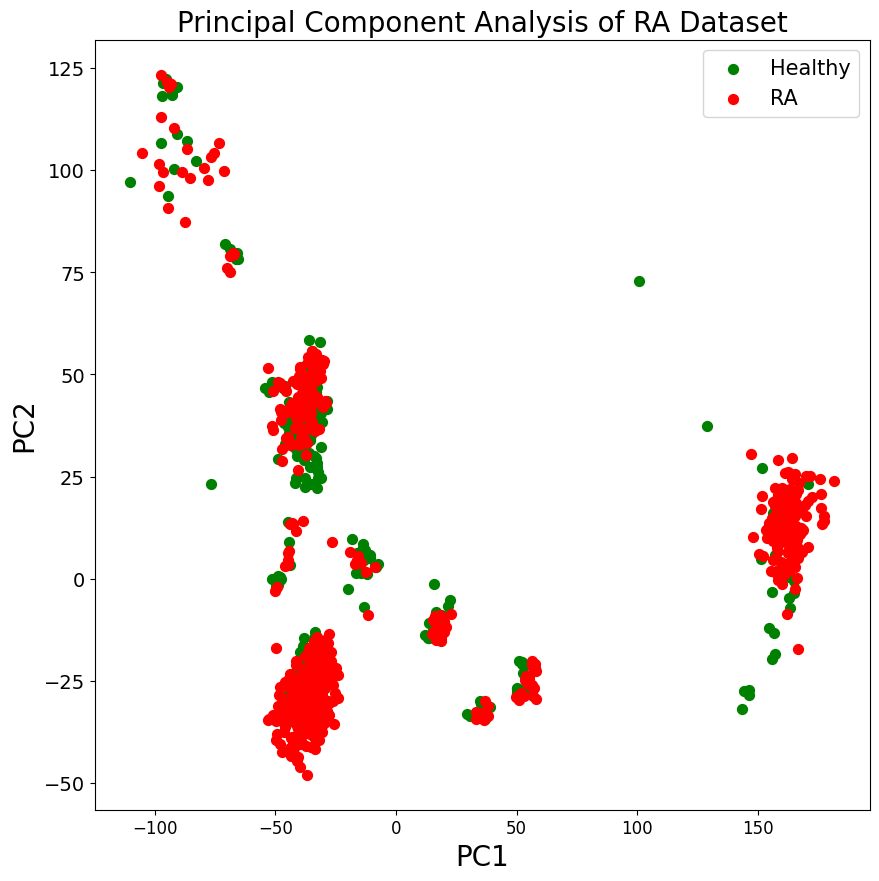

In [45]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('PC1', fontsize=20)
plt.ylabel('PC2', fontsize=20)
plt.title("Principal Component Analysis of RA Dataset", fontsize=20)
targets = ['Healthy', 'RA']
colors = ['g', 'r']
for target, color in zip(targets, colors):
    index = ra_dataset.to_pandas()['Condition'] == target
    plt.scatter(
        ra_pca_pandas.loc[index, 'PC1'], 
        ra_pca_pandas.loc[index, 'PC2'], 
        c=color, 
        s=50
    )

plt.legend(targets, prop={'size': 15})

# PCA for all conditions

INFO : --- Running PCA for condition 'RA'---
INFO : Loaded dataset for PCA with shape: Samples(1122), Genes(28671)
INFO : Dataset normalised | Mean: '2.1976488539930008e-18' Standard Deviation:'1.0'
INFO : Explained variation per principal component: [0.38808221 0.08700221]
INFO : ----------------------------------------------
INFO : --- Running PCA for condition 'T1D'---
INFO : Loaded dataset for PCA with shape: Samples(176), Genes(27591)
INFO : Dataset normalised | Mean: '-6.453174200595406e-18' Standard Deviation:'1.0000000000000007'
INFO : Explained variation per principal component: [0.25736401 0.16418631]
INFO : ----------------------------------------------
INFO : --- Running PCA for condition 'SSc'---
INFO : Loaded dataset for PCA with shape: Samples(229), Genes(20421)
INFO : Dataset normalised | Mean: '2.5208956536901144e-18' Standard Deviation:'1.0'
INFO : Explained variation per principal component: [0.35055071 0.1575874 ]
INFO : ---------------------------------------------

<Figure size 640x480 with 0 Axes>

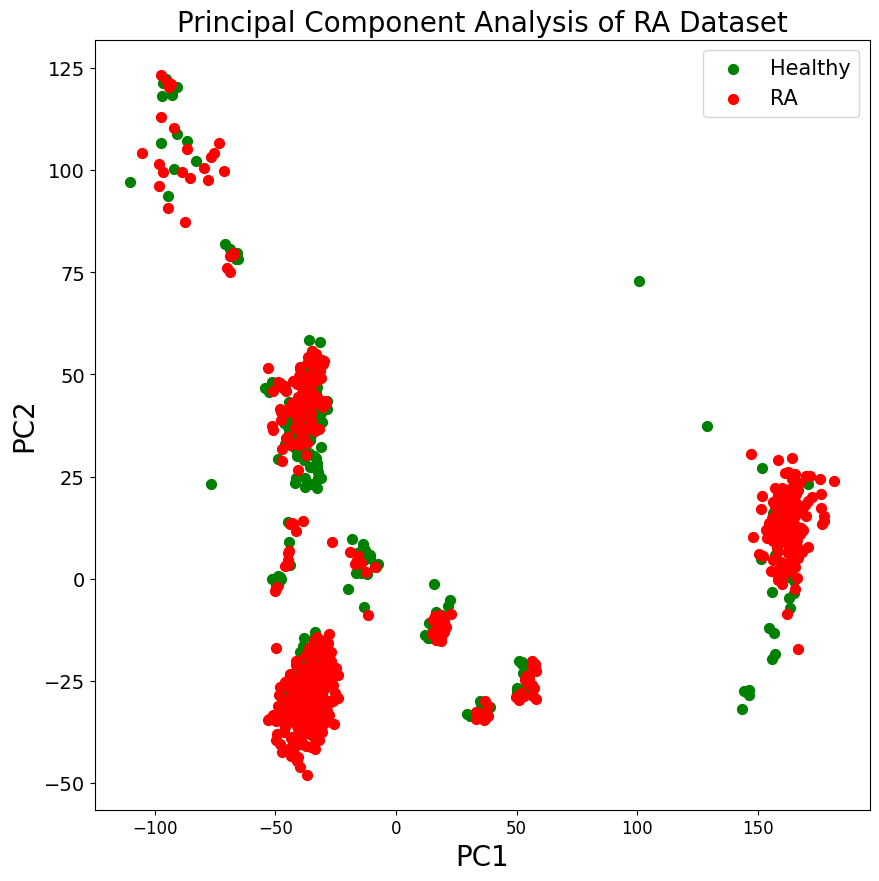

<Figure size 640x480 with 0 Axes>

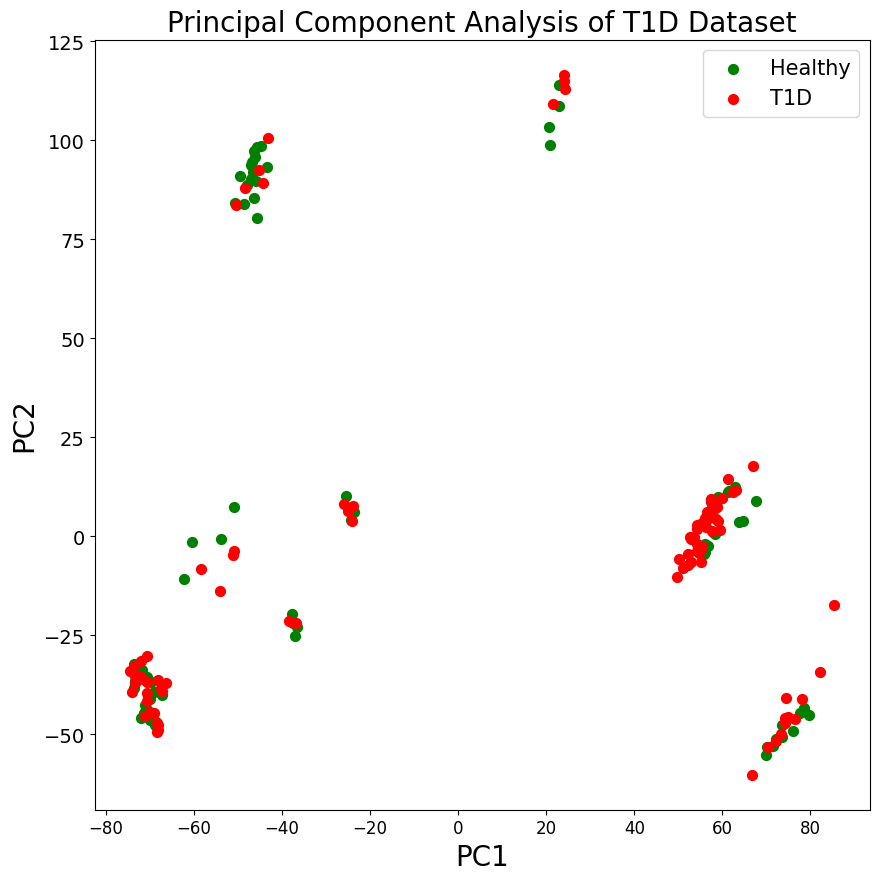

<Figure size 640x480 with 0 Axes>

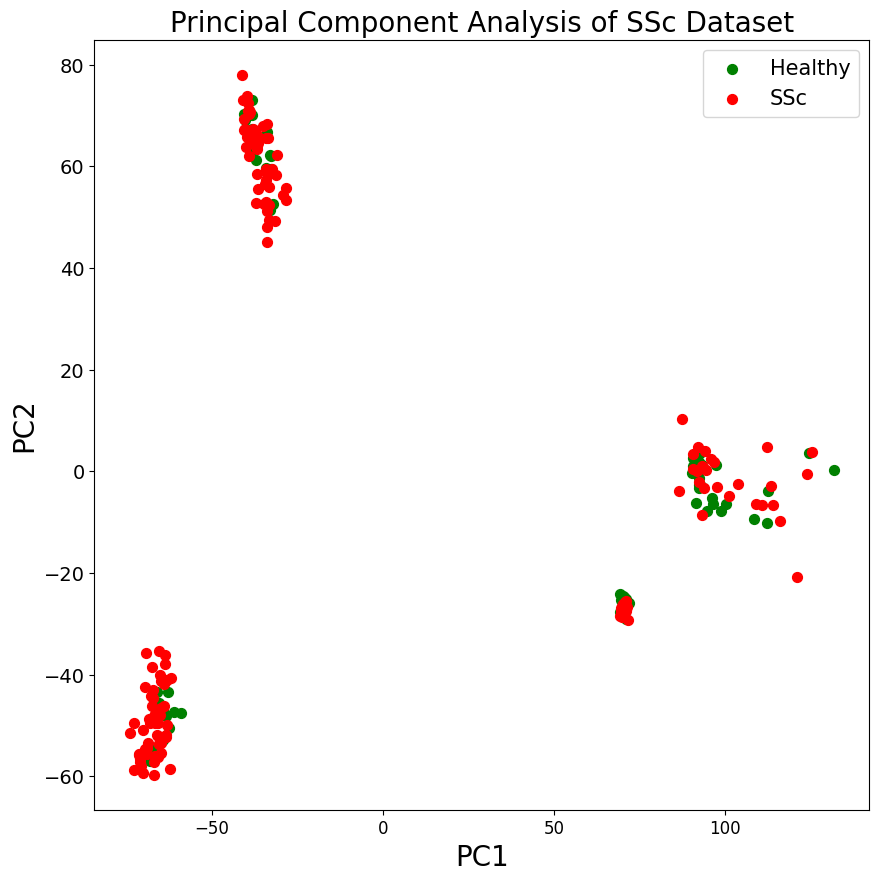

<Figure size 640x480 with 0 Axes>

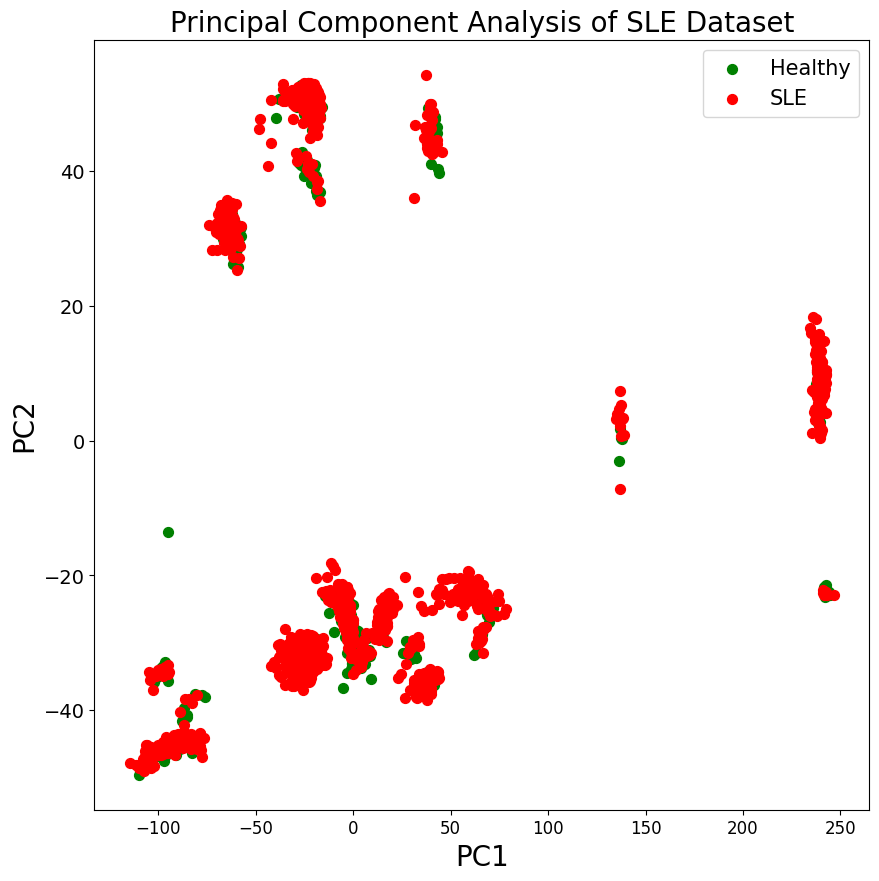

<Figure size 640x480 with 0 Axes>

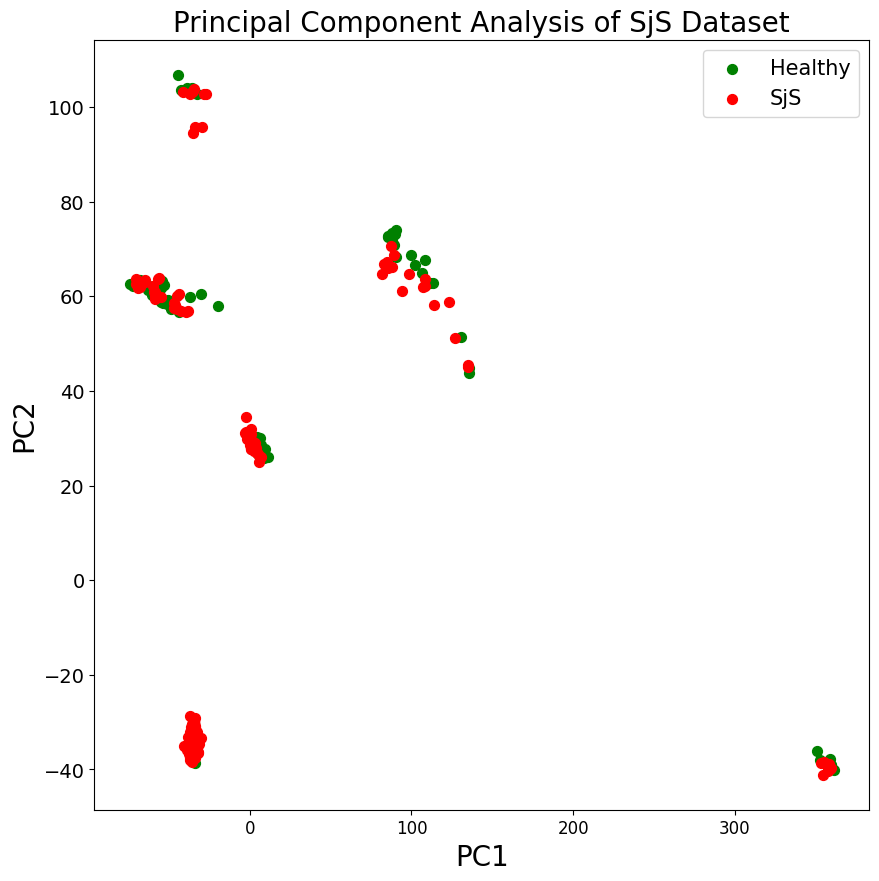

In [2]:
for condition in Condition:
    pca = PcaHelper(condition, files_path, metadata_path)
    pca.draw()